**Introduction**

The dataset that we have chosen is happiness 2017 dataset, one of Kaggle’s dataset. This dataset gives the happiness rank and happiness score of 155 countries around the world based on seven factors including family, life expectancy, economy, generosity, trust in government, freedom, and dystopia residual. 

There are three parts to my report as follows:

-Cleaning
-Visualization
-Prediction

**Purpose**
The first purpose of choosing this work is to find out which factors are more important to live a happier life.

The second purpose  is  implementing several machine learning algorithms to predict the happiness score and compare the result to discover which algorithm works better for this specific dataset.

**1-Importing Libraries**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**2-Get Data**

In [2]:
data=pd.read_csv('datasets_894_813759_2017.csv')

In [3]:
data.head()

,Continent,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Europe,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Europe,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Europe,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Europe,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


**3-Data Cleaning**

*3-1-Renaming some of the columns*


In [4]:
data.columns

Index(['Continent', 'Country', 'Happiness.Rank', 'Happiness.Score',
       'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [5]:
data.columns=data.columns.str.lower().str.replace('.','_')

In [6]:
data.head()

,continent,country,happiness_rank,happiness_score,whisker_high,whisker_low,economy__gdp_per_capita_,family,health__life_expectancy_,freedom,generosity,trust__government_corruption_,dystopia_residual
0,Europe,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Europe,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Europe,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Europe,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
data.columns

Index(['continent', 'country', 'happiness_rank', 'happiness_score',
       'whisker_high', 'whisker_low', 'economy__gdp_per_capita_', 'family',
       'health__life_expectancy_', 'freedom', 'generosity',
       'trust__government_corruption_', 'dystopia_residual'],
      dtype='object')

In [8]:
data.columns = ['continent','country', 'happiness_rank', 'happiness_score', 'whisker_high', 'whisker_low', 'economy','family','health','freedom','generosity','trust','dystopia_residual'] 
data.head(2)

,continent,country,happiness_rank,happiness_score,whisker_high,whisker_low,economy,family,health,freedom,generosity,trust,dystopia_residual
0,Europe,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [9]:
data.head()

,continent,country,happiness_rank,happiness_score,whisker_high,whisker_low,economy,family,health,freedom,generosity,trust,dystopia_residual
0,Europe,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Europe,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Europe,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Europe,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


*3-2-Removing unnecessary columns*

In [10]:
data.drop(['whisker_high','whisker_low'],axis=1,inplace=True)

In [11]:
data.head()

,continent,country,happiness_rank,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
0,Europe,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Europe,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Europe,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Europe,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 11 columns):
continent            155 non-null object
country              155 non-null object
happiness_rank       155 non-null int64
happiness_score      155 non-null float64
economy              155 non-null float64
family               155 non-null float64
health               155 non-null float64
freedom              155 non-null float64
generosity           155 non-null float64
trust                155 non-null float64
dystopia_residual    155 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.4+ KB


In [13]:
data.describe()

,happiness_rank,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


*3-3-Removing Null Values*

In [14]:
data.isnull()

,continent,country,happiness_rank,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
150,False,False,False,False,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False,False,False


In [15]:
print('Number of Null values in Columns')
print('\n')
data.isnull().sum()

Number of Null values in Columns




continent            0
country              0
happiness_rank       0
happiness_score      0
economy              0
family               0
health               0
freedom              0
generosity           0
trust                0
dystopia_residual    0
dtype: int64

No null values in the entire data set

**4-Visualisation**

*4-1-Correlation plot*


In [16]:
data.corr()

,happiness_rank,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
happiness_rank,1.000000,-0.992774,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
happiness_score,-0.992774,1.000000,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
economy,-0.813244,0.812469,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
family,-0.736753,0.752737,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
health,-0.780716,0.781951,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
freedom,-0.551608,0.570137,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
generosity,-0.132620,0.155256,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
trust,-0.405842,0.429080,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755
dystopia_residual,-0.484506,0.475355,0.024226,0.070506,0.054963,0.081926,-0.116627,-0.022755,1.000000


(9.5, -0.5)

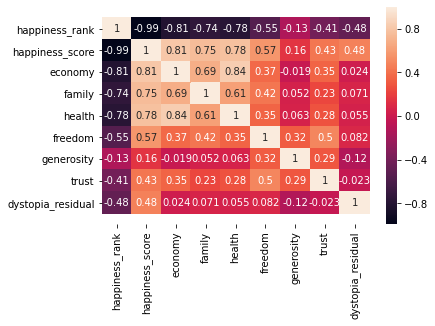

In [17]:
corrmatrix=data.corr()
ax=sns.heatmap(data.corr(),annot=True)
bottom, top = ax.get_ylim( )
ax.set_ylim( bottom +0.5, top -0.5)

<AxesSubplot:>

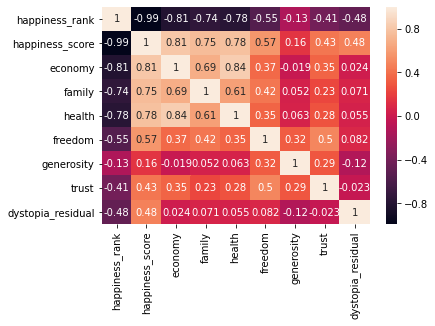

In [18]:
corrmatrix=data.corr()
sns.heatmap(data.corr(),annot=True)

According to the above cor plot, Economy, health, and family play the most significant role in contributing to happiness. Trust and generosity have the lowest impact on the happiness score.

*4-2-Creating separate dataframe for each continent*


In [19]:
data['continent'].unique()

array(['Europe', 'North America', 'Australia', 'Asia', 'South America',
       'Africa'], dtype=object)

In [20]:
#Africa

In [21]:
data_Africa=data[data['continent']=='Africa']

In [22]:
data_Africa.head()

,continent,country,happiness_rank,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
42,Africa,Nicaragua,43,6.071,0.737299,1.287216,0.653096,0.447552,0.301674,0.130688,2.513931
52,Africa,Algeria,53,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604
63,Africa,Mauritius,64,5.629,1.189396,1.209561,0.638007,0.491247,0.360934,0.042182,1.697584
67,Africa,Libya,68,5.525,1.101803,1.357564,0.520169,0.465733,0.152074,0.092610,1.835011
83,Africa,Morocco,84,5.235,0.878115,0.774864,0.597711,0.408158,0.032210,0.087763,2.456189


In [23]:
print('Mean of happiness score=',data_Africa['happiness_score'].mean())

Mean of happiness score= 4.280200015155556


In [24]:
#Europe           

In [25]:
data_Europe=data[data['continent']=='Europe']

In [26]:
print('Mean of happiness score=',data_Europe['happiness_score'].mean())

Mean of happiness score= 6.054931824909093


In [27]:
#Asia

In [28]:
data_Asia=data[data['continent']=='Asia']

In [29]:
print('Mean of happiness score=',data_Asia['happiness_score'].mean())

Mean of happiness score= 5.289738070333333


In [30]:
#South America  

In [31]:
data_South_America=data[data['continent']=='South America']

In [32]:
print('Mean of happiness score=',data_South_America['happiness_score'].mean())

Mean of happiness score= 6.070230814153846


In [33]:
#North America  

In [34]:
data_North_America=data[data['continent']=='North America']

In [35]:
print('Mean of happiness score=',data_North_America['happiness_score'].mean())

Mean of happiness score= 6.129666619888891


In [36]:
#Australia

In [37]:
data_Australia=data[data['continent']=='Australia']

In [38]:
print('Mean of happiness score=',data_Australia['happiness_score'].mean())

Mean of happiness score= 7.299000025


*4-3-Creating Correlation Plot for each continent**


In [39]:
#Africa

Text(0.5, 1.0, 'Happiness Matrix for Africa')

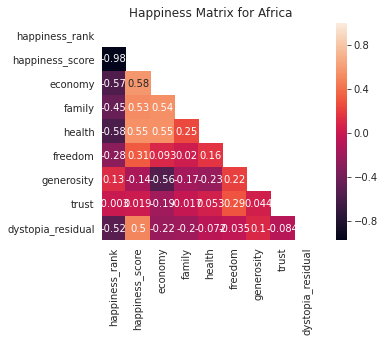

In [40]:
mask = np.zeros_like(data_Africa.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data_Africa.corr(), mask=mask, square=True,annot=True)
plt.title('Happiness Matrix for Africa')

Correlation between “Happiness Score” and the other variables in Africa:
Economy > Health> Family > Dystopia.Residual > Freedom
There is no correlation between happiness score and trust.
There is an inverse correlation between happiness score and generosity.

In [41]:
#Europe           

Text(0.5, 1.0, 'Happiness Matrix for Europe')

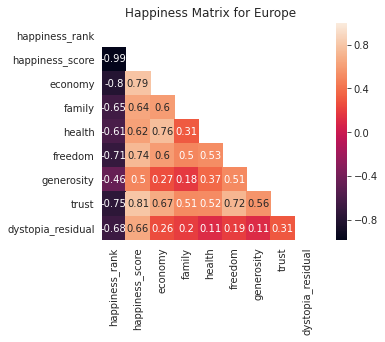

In [42]:
mask = np.zeros_like(data_Europe.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data_Europe.corr(), mask=mask,square=True,annot=True)
plt.title('Happiness Matrix for Europe')

Correlation between “Happiness Score” and the other variables in Europe:
Trust > Economy > Freedom >Family > Dystopia.Residual > Health > Generosity
The highest correlation between generosity and happiness score took place in Europe.

In [43]:
#Asia

Text(0.5, 1.0, 'Happiness Matrix for Asia')

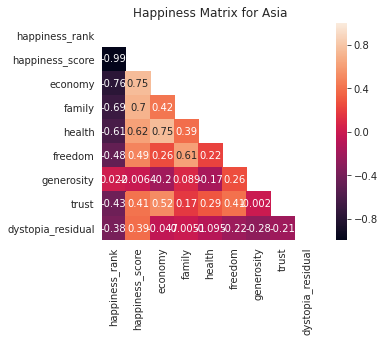

In [44]:
mask = np.zeros_like(data_Asia.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data_Asia.corr(), mask=mask, square=True,annot=True)
plt.title('Happiness Matrix for Asia')

Correlation between “Happiness Score” and the other variables in Asia:
Economy > Family > Health > Freedom > Trust > Dystopia.Residual
There is no correlation between happiness score and generosity.

In [45]:
#South_America

Text(0.5, 1.0, 'Happiness Matrix for South America')

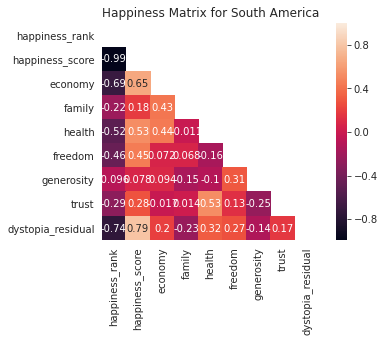

In [46]:
mask = np.zeros_like(data_South_America.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data_South_America.corr(), mask=mask, square=True,annot=True)
plt.title('Happiness Matrix for South America')

Correlation between “Happiness Score” and the other variables in South America:
Dystopia.Residual > Economy > Health > Freedom >  Trust > Family>Generosity 
The family is the least significant factor in South America.

In [47]:
#North_America

Text(0.5, 1.0, 'Happiness Matrix for North America')

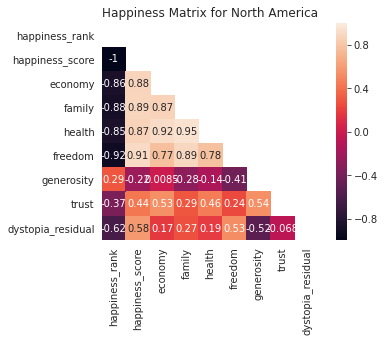

In [48]:
mask = np.zeros_like(data_North_America.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data_North_America.corr(), mask=mask, square=True,annot=True)
plt.title('Happiness Matrix for North America')

Correlation between “Happiness Score” and the other variables in North America:
Freedom> Family> Economy > Health> Dystopia_Residual > Trust
There is an inverse correlation between happiness score and generosity.

In [49]:
#Australia

Text(0.5, 1.0, 'Happiness Matrix for Australia')

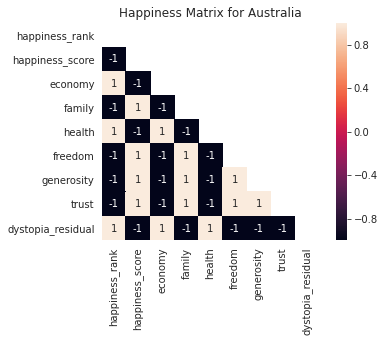

In [50]:
mask = np.zeros_like(data_Australia.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data_Australia.corr(), mask=mask, square=True,annot=True)
plt.title('Happiness Matrix for Australia')

*4-4-Happiness score comparison on different continents*

We will use scatter plot, box plot, and violin plot to see the happiness score distribution in different countries, how this score is populated in these continents and also will calculate the mean and median of happiness score for each of these continents.



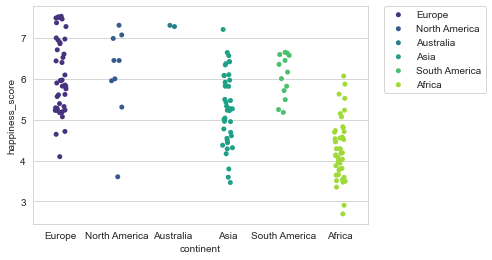

In [51]:
sns.set_style('whitegrid')
sns.stripplot(x='continent',y='happiness_score',data=data,palette='viridis')
plt.legend(['Europe', 'North America', 'Australia', 'Asia', 'South America','Africa'],bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)


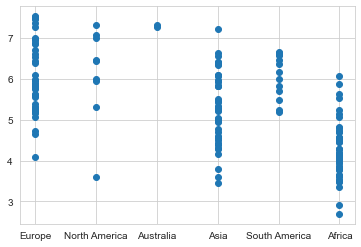

In [52]:
plt.scatter(x=data['continent'],y=data['happiness_score'])


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Asia'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Africa')])

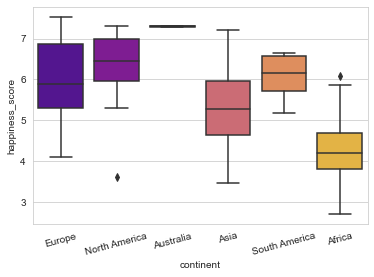

In [53]:
sns.boxplot(x='continent',y='happiness_score',data=data,palette='plasma')
plt.xticks(rotation=15)

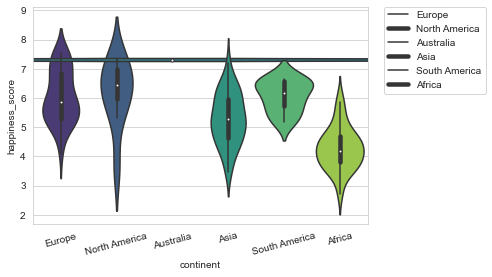

In [54]:
sns.violinplot(x='continent',y='happiness_score',data=data,width=25,palette='viridis')
plt.xticks(rotation=15)
plt.legend(['Europe', 'North America', 'Australia', 'Asia', 'South America','Africa'],bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

In [55]:
pd.DataFrame({'Mean of Happiness Score':data.groupby('continent').mean()['happiness_score'],'Median of Happiness Score':data.groupby('continent').median()['happiness_score']})

,Mean of Happiness Score,Median of Happiness Score
continent,,
Africa,4.280200,4.1900
Asia,5.289738,5.2655
Australia,7.299000,7.2990
Europe,6.054932,5.8760
North America,6.129667,6.4520
South America,6.070231,6.1680


As we have seen before, Australia has the highest median happiness score. Europe, South America, and North America are in the second place regarding median happiness score. Asia has the lowest median after Africa. We can see the range of happiness score for different continents, and also the concentration of happiness score.



*4-5-Scatter plot with regression line*


C:\Users\Soha\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


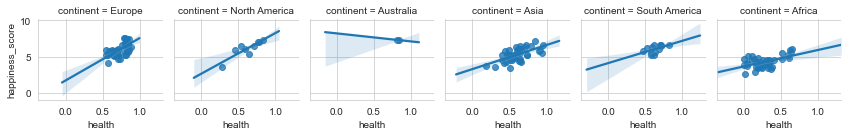

In [56]:
sns.lmplot(x='health',y='happiness_score', data=data, col='continent',palette='plasma',size=2)
 

The correlation between life expectancy and happiness score in Europe, North America, and Asia is more significant than the other continents. Worth mentioning that we will not take Australia into account because there are just two countries in Australia and creating scatter plot with the regression line for this continent will not give us any insight.



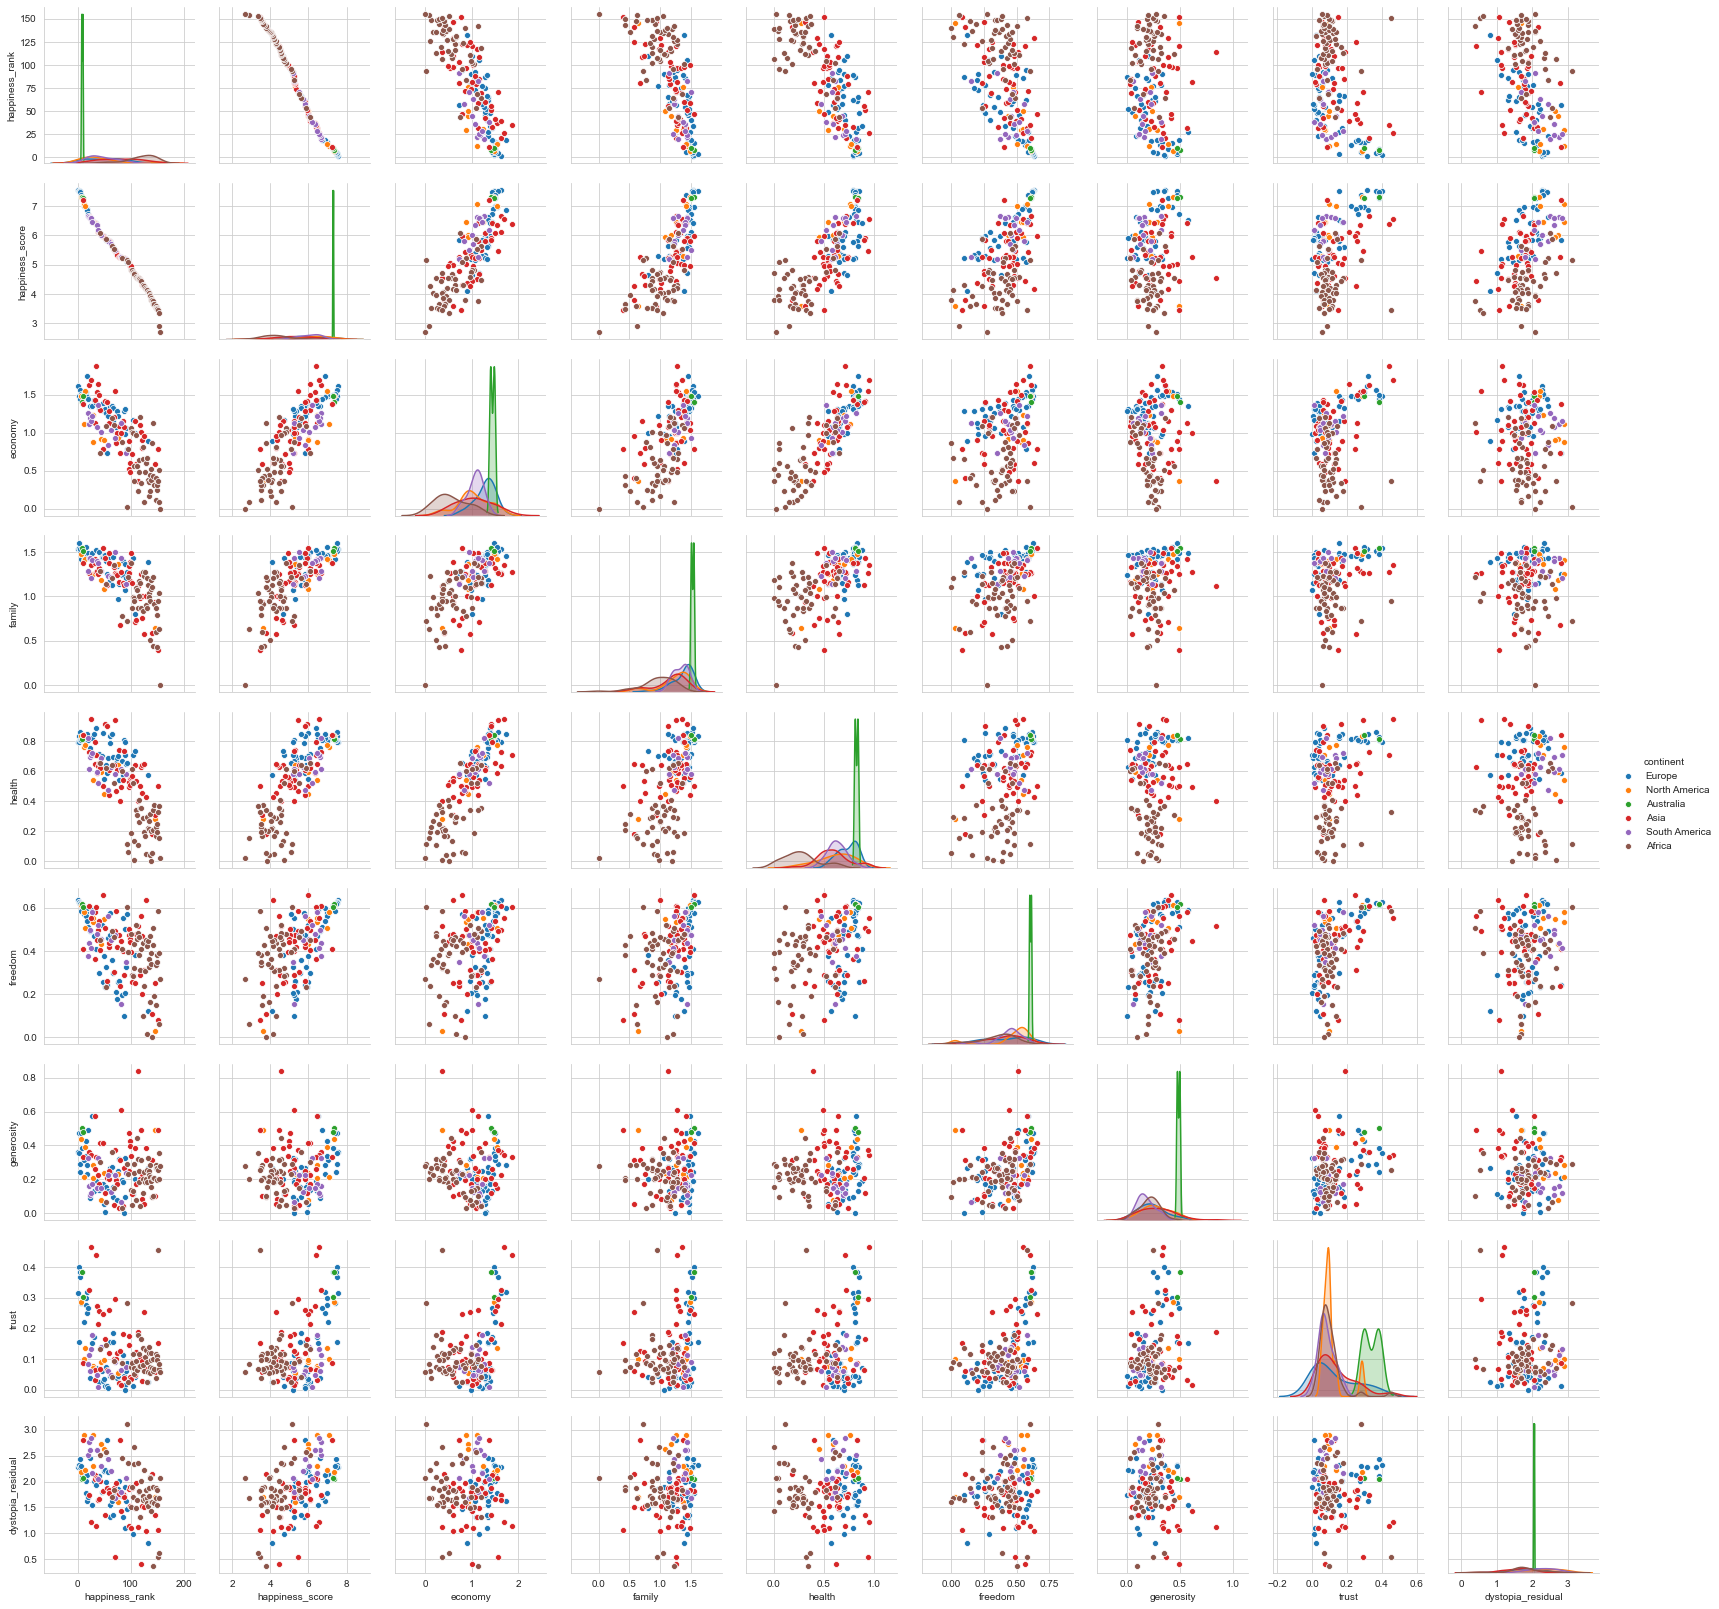

In [57]:
sns.pairplot(data,hue='continent')

**5-Prediction**

In this section, we will implement several machine learning algorithms to predict happiness score. First, we should split our dataset into training and test set. Our dependent variable is happiness score, and the independent variables are family, economy, health, trust, freedom, generosity, and dystopia residual.

*5-1-Linear Regression*

In [58]:
data.head(2)

,continent,country,happiness_rank,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
0,Europe,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [67]:
X=data[['economy','family','health','freedom', 'generosity','trust','dystopia_residual']]
y=data['happiness_score']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model1=LinearRegression()

In [72]:
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
prediction1=model1.predict(X_test)

In [74]:
from sklearn import metrics

In [75]:
print('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,prediction1)))

RMSE= 0.0003319547394507118


Text(0.5, 1.0, 'Linear Regression')

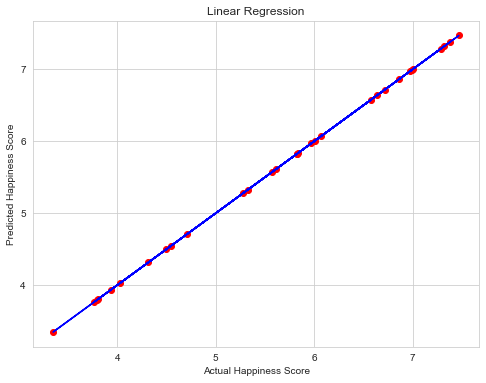

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=prediction1,c='r')
plt.plot(y_test,y_test,c='b')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Linear Regression')

As we expected, actual versus predicted plot shows the accuracy of our model.



*5-2-SVR*

In [77]:
from sklearn.svm import SVR

In [78]:
model2=SVR()

In [79]:
model2.fit(X_train,y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
prediction2=model2.predict(X_test)

In [83]:
print('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,prediction2)))

RMSE= 0.11852274031131288


Text(0.5, 1.0, 'SVR')

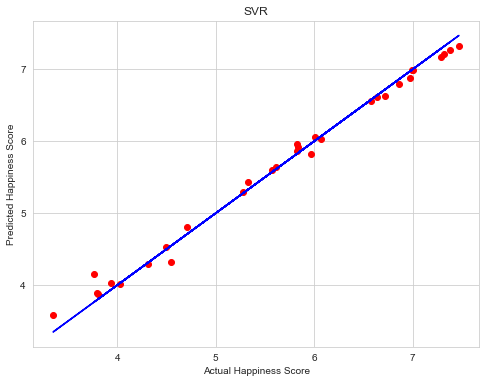

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=prediction2,c='r')
plt.plot(y_test,y_test,c='b')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('SVR')

Support Vector Regression predicted happiness scores with pretty high accuracy.



*5-3-Decision Tree*

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
model3=DecisionTreeRegressor()

In [87]:
model3.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [88]:
prediction3=model3.predict(X_test)

In [89]:
print('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,prediction3)))

RMSE= 0.504799419617637


Text(0.5, 1.0, 'Decision Tree Regression')

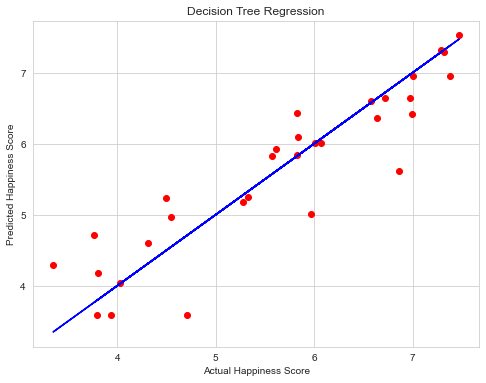

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=prediction3,c='r')
plt.plot(y_test,y_test,c='b')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Decision Tree Regression')

It seems that Decision Tree Regression is not an excellent choice for this dataset. Let’s see the tree.



*5-4-Random Forest*

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
model4=RandomForestRegressor()

In [93]:
model4.fit(X_train,y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [94]:
prediction4=model4.predict(X_test)

In [95]:
print('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,prediction4)))

RMSE= 0.36812916364853926


Text(0.5, 1.0, 'Random Forest Regression')

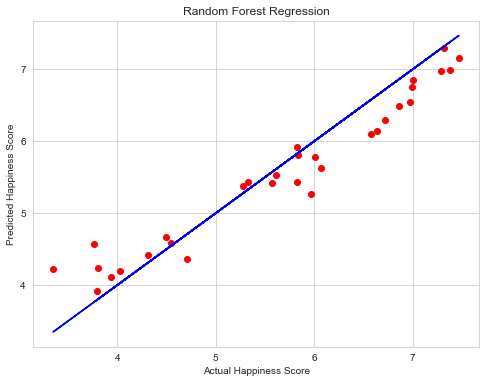

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=prediction4,c='r')
plt.plot(y_test,y_test,c='b')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Random Forest Regression')

Randon Forest regression is not as good as SVR regarding predicted happiness scores but did a better job than Decision Tree.

